<h1>How Great was The Great One?</h1>
<h3>A deep dive into the game-changing legacy of Wayne Gretzky</h3>
<h5>By Phil Rongo</h5>


<h2>Abstract:</h2>
Wayne Gretzky has been called “The Greatest Hockey Player who Ever Lived” by fans, coaches, fellow NHL players, and even the NHL itself. In this notebook, we venture to quantify visually just how dominant The Great One truly was - across almost all facets of the game. We will visualize offensive, defensive, and liability aspects of Gretzky's game and compare his achievements and statistics against not only the stars of today, but against other all time greats as well. 

Raw data for this project was gathered from the **Hockey Reference** website (https://www.hockey-reference.com/), however some datasets - such as career_stats_greats.csv - were manually spliced together from multiple pages on their website.



<h2>Data PreProcessing</h2>

First, we will preprocess our data. We'll start by loading our three separate datasets into dataframes. These datasets will encompass:

- Total career stats of all-time greats and current NHL stars
- Stats for all players during the 1986-1987 season - a season often held to be Gretzky's best
- Stats for all players during the 2022-2023 season - a recent season of intense competition

All of these dataframes include the same information - with the exception of TOI (time on ice), which was not recorded until 1997. As such, 1986-1987 is missing the stat entirely, and players in the all-time-greats dataset will only have the statistic for seasons played after 1996.


In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

greats_df = pd.read_csv("./data/career_stats_greats.csv")
szn_87_df = pd.read_csv("./data/allplayers_86_87_szn.csv")
szn_23_df = pd.read_csv("./data/allplayers_22_23_szn.csv")
szn_23_df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,-9999
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,8:59,0,1,0,0,NaN,abruzni01
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,102,13.7,1102,14:19,81,244,337,289,53.8,acciano01
2,2,Noel Acciari,31.0,STL,C,54,10,8,18,-6,...,74,13.5,787,14:35,55,168,275,239,53.5,acciano01
3,2,Noel Acciari,31.0,TOR,C,23,4,1,5,2,...,28,14.3,315,13:41,26,76,62,50,55.4,acciano01
4,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,16:07,38,19,0,0,NaN,addisca01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,948,Radim Zohorna,26.0,CGY,F,8,0,0,0,-2,...,3,0.0,67,8:25,1,5,21,18,53.8,zohorra01
1139,948,Radim Zohorna,26.0,TOR,F,2,1,0,1,1,...,6,16.7,18,9:12,1,2,0,2,0.0,zohorra01
1140,949,Artem Zub,27.0,OTT,D,53,3,7,10,2,...,41,7.3,1073,20:15,67,131,0,0,NaN,zubar01
1141,950,Mats Zuccarello,35.0,MIN,LW,78,22,45,67,-3,...,198,11.1,1575,20:12,51,51,24,36,40.0,zuccama01


Next, we will drop all duplicated records in the respective season dataframes. When a player is traded mid-season, separate entries are posted for each individual team. The player is also given a "TOT" entry, which is team-independent stats for the entire season. We will be keeping this statistic for traded players. Since this statistic appears first when sorting by player name (with their individual team stats following) we will simply keep the first entry for these players.

In [2]:
szn_23_df.drop_duplicates(subset="Player", keep="first", inplace=True)
szn_87_df.drop_duplicates(subset="Player", keep="first", inplace=True)


Calling .info() on this dataset shows that there are some missing (null) values for some columns. Many of these columns are position specific (goalies will not have shot percentages, skaters will not have save percentage), so we will only impute the Age column. 

In [3]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")
szn_23_df['Age']= mode_imputer.fit_transform(szn_23_df[['Age']])
szn_87_df['Age']=mode_imputer.fit_transform(szn_87_df[['Age']])
szn_23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 1142
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      950 non-null    int64  
 1   Player  950 non-null    object 
 2   Age     950 non-null    float64
 3   Tm      950 non-null    object 
 4   Pos     950 non-null    object 
 5   GP      950 non-null    int64  
 6   G       950 non-null    int64  
 7   A       950 non-null    int64  
 8   PTS     950 non-null    int64  
 9   +/-     950 non-null    int64  
 10  PIM     950 non-null    int64  
 11  PS      950 non-null    float64
 12  EV      950 non-null    int64  
 13  PP      950 non-null    int64  
 14  SH      950 non-null    int64  
 15  GW      950 non-null    int64  
 16  EV.1    950 non-null    int64  
 17  PP.1    950 non-null    int64  
 18  SH.1    950 non-null    int64  
 19  S       950 non-null    int64  
 20  S%      922 non-null    float64
 21  TOI     950 non-null    int64  
 22  ATOI  

Next, we will remove defensemen and goalies from the dataframe. It would not be fair to compare them to Gretzky, because they serve different purposes as part of the team. Since Gretzky was a Center, it is most correct to compare him to other Centers, however to be completely thorough, we will compare him to all offensive players on a team -- Center, Right Wing, and Left Wing. 

In addition, we will drop the columns "-9999" and "S%" in all dataframes, since these are (1) autogenerated for awards and (2) redundant since we will hand-calculate this value from shots. We will also remove the TOI and ATOI column from the 1987 season dataframe since this data is not available before 1997.

In [4]:
offensive_pos = ["C", "LW", "RW"]
szn_23_df = szn_23_df[szn_23_df['Pos'].isin(offensive_pos)].drop(["S%", "-9999"], axis=1)
szn_87_df = szn_87_df[szn_87_df['Pos'].isin(offensive_pos)].drop(['S%', "TOI","ATOI", "-9999"], axis=1)

szn_87_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 783
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      437 non-null    int64  
 1   Player  437 non-null    object 
 2   Age     437 non-null    int64  
 3   Tm      437 non-null    object 
 4   Pos     437 non-null    object 
 5   GP      437 non-null    int64  
 6   G       437 non-null    int64  
 7   A       437 non-null    int64  
 8   PTS     437 non-null    int64  
 9   +/-     437 non-null    int64  
 10  PIM     437 non-null    int64  
 11  PS      437 non-null    float64
 12  EV      437 non-null    int64  
 13  PP      437 non-null    int64  
 14  SH      437 non-null    int64  
 15  GW      437 non-null    int64  
 16  EV.1    437 non-null    int64  
 17  PP.1    437 non-null    int64  
 18  SH.1    437 non-null    int64  
 19  S       437 non-null    int64  
dtypes: float64(1), int64(16), object(3)
memory usage: 71.7+ KB


One more thing we will do, since the dataframes are taking a bit of space, is convert all categorical variables to a categorical data type. This are the Team and Pos columns.

In [5]:
szn_23_df['Tm'] = szn_23_df['Tm'].astype("category")
szn_87_df['Tm'] = szn_87_df['Tm'].astype("category")

szn_23_df['Pos'] = szn_23_df['Pos'].astype("category")
szn_87_df['Pos'] = szn_87_df['Pos'].astype("category")

<h2>The 1986-87 Season</h2>

Now let's dive in to the 1986-1987 season. This season is widely considered Gretzky's best season - he had already led his team to win the Stanley Cup twice before in 1984 and 1985 and would go on to do it twice more, once this season (1987) and again in 1988.

But was he really the deciding factor in his team's dominance? His team did not, after all, win every year in a row. How dominant was Gretzky when compared to the other talented professionals of his day?

<h3>Offensive Effectiveness</h3>


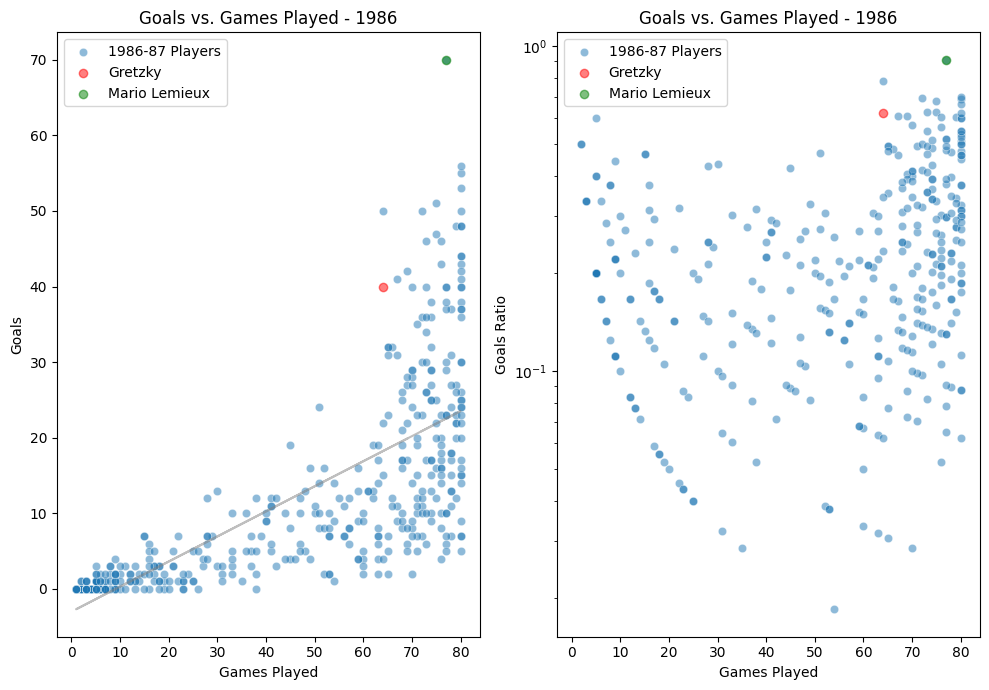

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

non_gretzky = szn_87_df[szn_87_df['Player']!= "Wayne Gretzky*"]
gretzky = szn_87_df[szn_87_df['Player'] == "Wayne Gretzky*"]
def get_regression_line(col1, col2):
    coeffs = np.polyfit(szn_87_df[col1], szn_87_df[col2], 1)
    slope = coeffs[0]
    intercept = coeffs[1]
    regression_line = (non_gretzky[col1] * slope) + intercept
    return regression_line

regression_line = get_regression_line("GP", "G")
#goals
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.scatterplot(non_gretzky, x="GP", y='G', alpha=0.5, label="1986-87 Players")
plt.scatter(gretzky['GP'], gretzky['G'], color="red", alpha=0.5, label='Gretzky')
plt.scatter(non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['GP'], 
            non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['G'], color="green", alpha=0.5,
            label='Mario Lemieux')
plt.plot(non_gretzky['GP'], regression_line, color="grey", alpha=0.5)
plt.legend()
plt.title("Goals vs. Games Played - 1986")
plt.xlabel("Games Played")
plt.ylabel("Goals")

#goals per game
plt.subplot(1,2,2)
goals_per_game_ratio = non_gretzky['G']/non_gretzky["GP"]

sns.scatterplot(x=non_gretzky['GP'], y=goals_per_game_ratio, alpha=0.5, label="1986-87 Players")
plt.yscale("log")
plt.scatter(gretzky['GP'], gretzky['G']/gretzky['GP'], color="red", alpha=0.5, label='Gretzky')
plt.scatter(non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['GP'], 
            non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['G']/non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['GP'],
            color="green", alpha=0.5,
            label='Mario Lemieux')
plt.legend()
plt.title("Goals vs. Games Played - 1986")
plt.xlabel("Games Played")
plt.ylabel("Goals Ratio")
plt.tight_layout()




Text(0, 0.5, 'Assists')

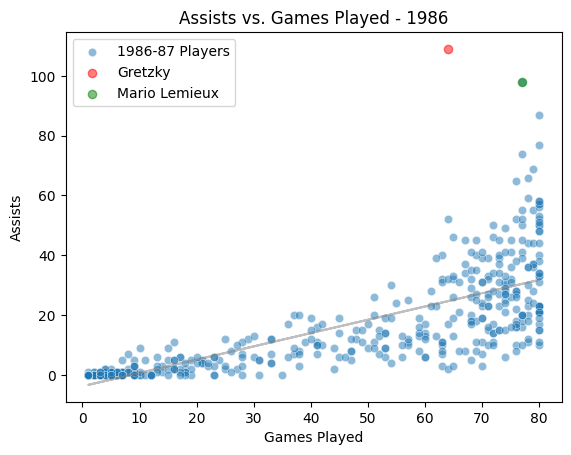

In [32]:
regression_line = get_regression_line("GP", "A")
sns.scatterplot(non_gretzky, x="GP", y='A', alpha=0.5, label="1986-87 Players")
plt.scatter(gretzky['GP'], gretzky['A'], color="red", alpha=0.5, label='Gretzky')
plt.scatter(non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['GP'], 
            non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['A'], color="green", alpha=0.5,
            label='Mario Lemieux')
plt.plot(non_gretzky['GP'], regression_line, color="grey", alpha=0.5)

plt.legend()
plt.title("Assists vs. Games Played - 1986")
plt.xlabel("Games Played")
plt.ylabel("Assists")

Text(0, 0.5, 'Total Points')

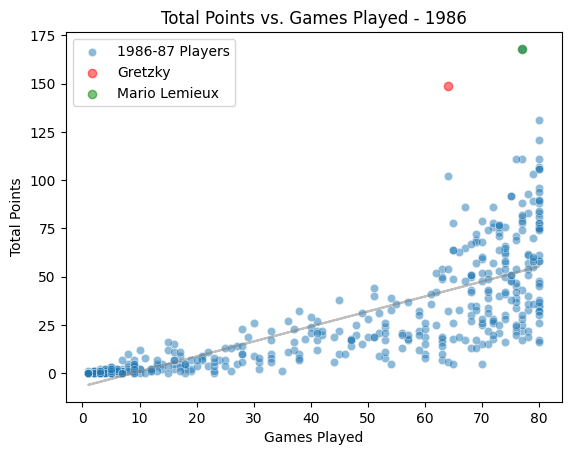

In [33]:
regression_line = get_regression_line("GP", "PTS")
sns.scatterplot(non_gretzky, x="GP", y='PTS', alpha=0.5, label="1986-87 Players")
plt.scatter(gretzky['GP'], gretzky['PTS'], color="red", alpha=0.5, label='Gretzky')
plt.scatter(non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['GP'], 
            non_gretzky[non_gretzky['Player']=="Mario Lemieux*"]['PTS'], color="green", alpha=0.5,
            label='Mario Lemieux')
plt.plot(non_gretzky['GP'], regression_line, color="grey", alpha=0.5)

plt.legend()
plt.title("Total Points vs. Games Played - 1986")
plt.xlabel("Games Played")
plt.ylabel("Total Points")